In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
%cd '/content/gdrive/Shareddrives/ECE 199 2s2223/models/intent_classifier'

In [ ]:
!pip install lightning wandb

In [ ]:
!python train.py --use_config --run_name 6-encoder-adam

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 

In [ ]:
!python test.py --ckpt_dir "checkpoints/small_model.ckpt"

# Test Gaze Output
- To change gaze model: change --gaze_outputs

| Gaze Model | csv output |
| --- | --- |
| Base model | trial.csv |
| Fewer skips | fewer_skips.csv |
| Fewer skips, reduced dataset | reduced_dataset.csv |
| Best small scale | with_depth.csv |
| No depth | no_depth.csv |
| With head | with_head_pretrained.csv |

- To change intent model:

| Intent Model | trained weights |
| --- | --- |
| 6 encoders | new_dataset.ckpt |
| 3 encoders | small_model.ckpt |




In [5]:
!python eval.py --ckpt_dir "checkpoints/small_model.ckpt" --device "cuda" --gaze_outputs "gaze_outputs/with_head_pretrained.csv"

[[53  5  1  1  9  3  3  2]
 [ 6 11  1  2  1  1  1  1]
 [ 3  0  4  4  2  3  0  5]
 [ 0  0  1  3  1  0  0  2]
 [ 1  1  0  1 14  0  0  1]
 [ 7  0  0  1  1  8  7  2]
 [ 1  2  2  0  2  1  6  1]
 [ 2  0  0  0  1  0  0  9]]
-----Results------
Accuracy: 54.0
Precision: 46.191
Recall: 50.015
F1 Score: 45.53
Balanced Accuracy: 50.015


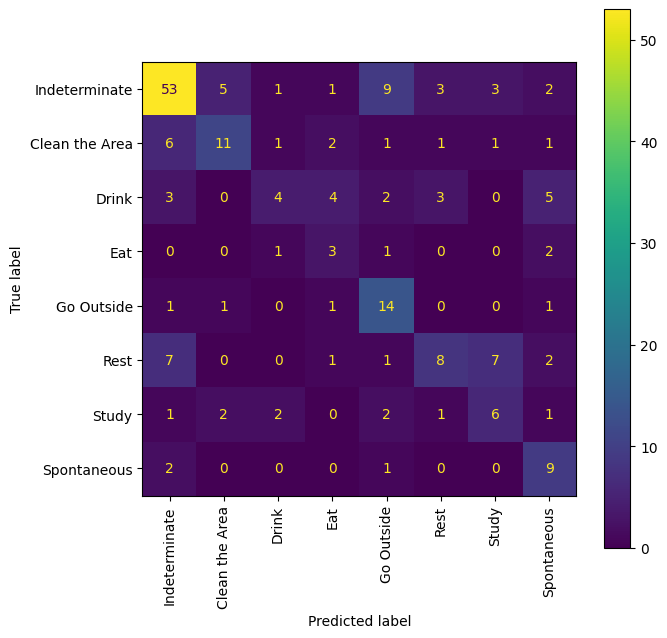

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

cm = np.array([[53, 5,  1,  1,  9,  3,  3,  2],[6, 11,  1,  2,  1,  1,  1,  1],[3,  0,  4,  4,  2,  3,  0,  5],[0,  0,  1,  3,  1,  0,  0,  2],[1,  1,  0,  1, 14,  0,  0,  1],[7,  0,  0,  1,  1,  8,  7,  2],[1,  2,  2,  0,  2, 1,  6,  1],[2,  0,  0,  0,  1, 0,  0, 9]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,display_labels=['Indeterminate','Clean the Area','Drink','Eat','Go Outside','Rest','Study','Spontaneous'],
    )

fig, ax = plt.subplots(figsize=(7, 7))
disp.plot(ax=ax)
plt.xticks(rotation=90)
# plt.savefig("cm.png")
plt.show()


In [ ]:
-----Results------
Accuracy: 48.5
Precision: 46.09
Recall: 38.938
F1 Score: 38.893

# Default:
- Accuracy: 98.0 %
- Precision: 97.502 %
- Recall: 96.736 %
- F1 Score: 97.073 %
# Small:
- Accuracy: 98.0 %
- Precision: 97.502 %
- Recall: 96.736 %
- F1 Score: 97.073 %

[[54  7  1  0  9  1  2  3]
 [ 8 11  0  2  1  0  0  2]
 [ 4  0  5  2  2  3  0  5]
 [ 0  0  1  2  1  0  0  3]
 [ 1  1  0  1 13  0  0  2]
 [ 5  0  0  1  2  8  9  1]
 [ 1  2  0  0  1  2  6  3]
 [ 1  0  1  0  1  0  0  9]]


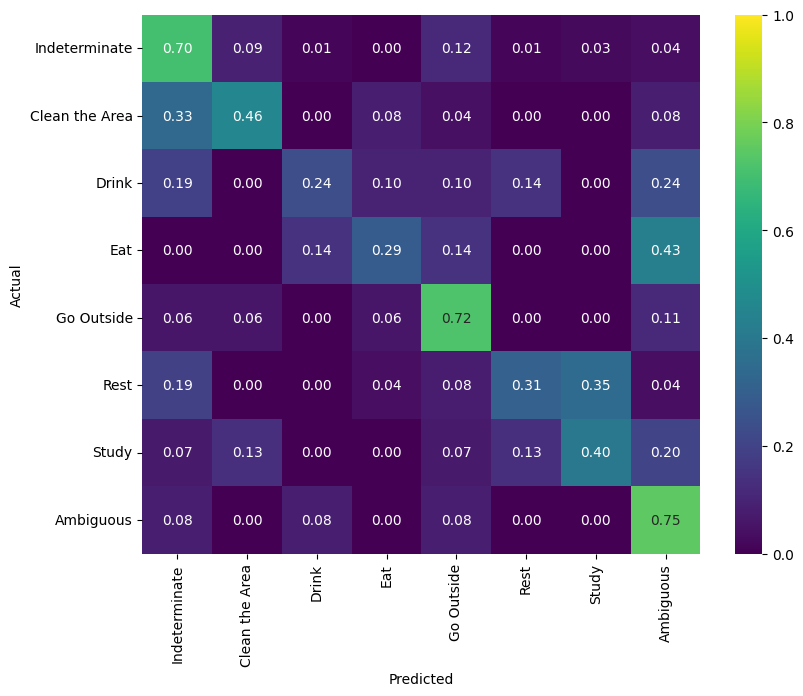

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from eval import eval_overall

class DummyArgs(): pass

args = DummyArgs()
args.ckpt_dir = "checkpoints/small_model.ckpt"
args.device = "cuda"
args.gaze_outputs =  "gaze_outputs/with_head_from_nodepth_not_latest.csv"

a, p, r, f, b, cm = eval_overall(args)

target_names = ['Indeterminate','Clean the Area','Drink','Eat','Go Outside','Rest','Study','Ambiguous']

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap="viridis", vmin=0, vmax=1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig("cm_sns.png")
plt.show(block=False)

